Statistics for Average Total Wage by industry:
53: Mean=$114644284.52, Std Dev=$33748734.86, Max=$198040023.00, Min=$78891773.00
624: Mean=$72728597.73, Std Dev=$29007779.10, Max=$125712588.00, Min=$33022055.00
811: Mean=$54885416.45, Std Dev=$7248239.18, Max=$69611616.00, Min=$44311507.00


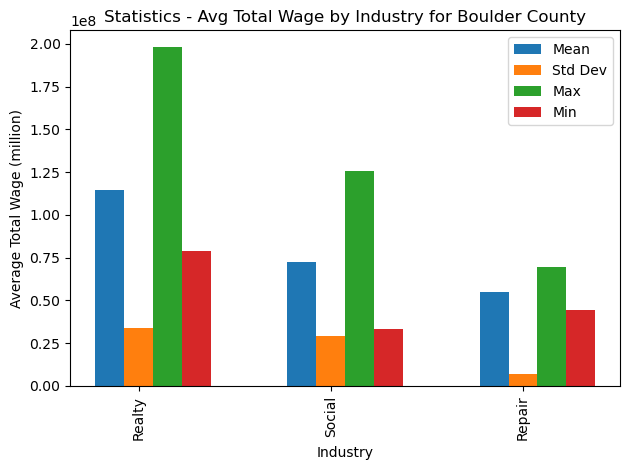

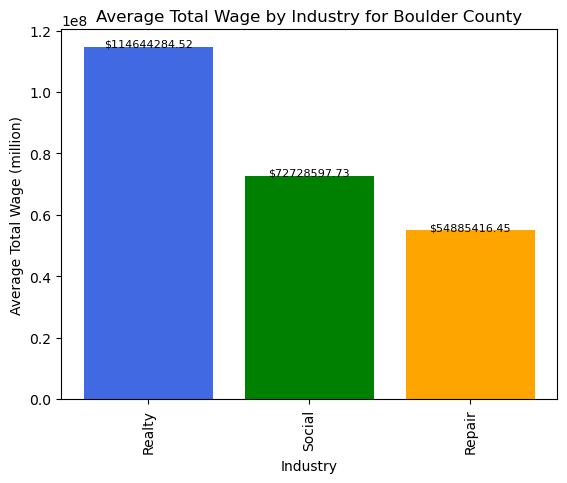

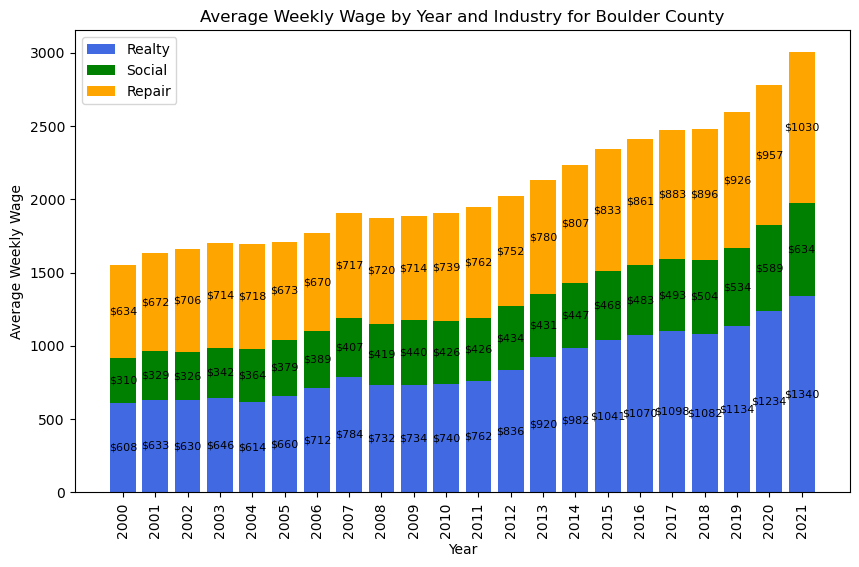

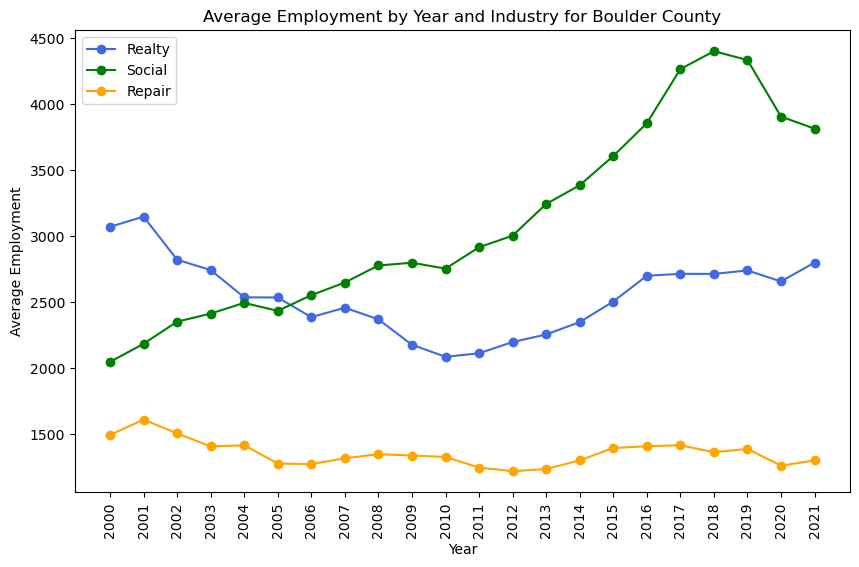

In [173]:
import sqlite3
import statistics
import matplotlib.pyplot as plt
import numpy as np

# Connect to DB
conn = sqlite3.connect('index.db')
c = conn.cursor()

# Select query
query = '''
SELECT *
FROM bouldercounty
WHERE codetitle != "Aggregate of all types" AND periodtype = "1"
ORDER BY periodyear DESC
'''

# Execute query and close connection
c.execute(query)
data = c.fetchall()
conn.close()

# Convert data to NumPy
year = np.array([row[8] for row in data])
avgemp = np.array([float(row[20]) for row in data])
taxwage = np.array([float(row[24]) for row in data])
totwage = np.array([float(row[25]) for row in data])
avgwkwage = np.array([float(row[26]) for row in data])
industry = np.array([row[13] for row in data])

# Calculate statistics 
unique_industry = np.unique(industry)
unique_year = np.unique(year)
avg_tot_wage_by_industry = [np.mean(totwage[industry == ind]) for ind in unique_industry]
std_tot_wage_by_industry = [np.std(totwage[industry == ind]) for ind in unique_industry]
max_tot_wage_by_industry = [np.max(totwage[industry == ind]) for ind in unique_industry]
min_tot_wage_by_industry = [np.min(totwage[industry == ind]) for ind in unique_industry]

# Print statistics
print("Statistics for Average Total Wage by industry:")
for ind, avg, std, mx, mn in zip(unique_industry, avg_tot_wage_by_industry, std_tot_wage_by_industry, max_tot_wage_by_industry, min_tot_wage_by_industry):
    print(f"{ind}: Mean=${avg:.2f}, Std Dev=${std:.2f}, Max=${mx:.2f}, Min=${mn:.2f}")


# Graphs    
# Expending the assignment
# Define custom colors & label for each industry
colors = ['royalblue' if ind == '53' else 'green' if ind == '624' else 'orange' if ind == '811' else 'gray' for ind in unique_industry]
labels = ['Realty' if ind == '53' else 'Social' if ind == '624' else 'Repair' if ind == '811' else ind for ind in unique_industry]

# Graph 1
# Set up the plot, index
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15

# means, stds, maxs, and mins for each industry
rects1 = ax.bar(index, means, bar_width, label='Mean')
rects2 = ax.bar(index + bar_width, stds, bar_width, label='Std Dev')
rects3 = ax.bar(index + 2*bar_width, maxs, bar_width, label='Max')
rects4 = ax.bar(index + 3*bar_width, mins, bar_width, label='Min')

# Add labels, title, and legend
ax.set_xlabel('Industry')
ax.set_ylabel('Average Total Wage (million)')
ax.set_title('Statistics - Avg Total Wage by Industry for Boulder County')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
plt.tight_layout()
plt.savefig('3. Average Total Wage.png')
plt.show()

# Graph 2
# Calculate average total wage by industry
avg_tot_wage_by_industry = [np.mean(totwage[industry == ind]) for ind in unique_industry]
# Create bar chart & save
plt.bar(labels, avg_tot_wage_by_industry, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Average Total Wage (million)')
plt.title('Average Total Wage by Industry for Boulder County')
for i, v in enumerate(avg_tot_wage_by_industry):
    plt.text(i, v, f"${v:.2f}", ha='center', fontsize=8)
plt.savefig('4. avg_total_wage_by_industry.png')
plt.show()

# Graph 3
# Calculate average wage by year and industry
avg_wage_by_year_industry = {}
for ind in unique_industry:
    avg_wage_by_year_industry[ind] = [np.mean(avgwkwage[(year == y) & (industry == ind)]) for y in unique_year]
# Labelling and coloring    
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(unique_year))
# Create stacked bar chart & save
for ind, color in zip(unique_industry, colors):
    plt.bar(unique_year, avg_wage_by_year_industry[ind], bottom=bottom, label=labels[unique_industry.tolist().index(ind)], color=color)
    for i, avg_wage in enumerate(avg_wage_by_year_industry[ind]):
        plt.text(unique_year[i], bottom[i]+avg_wage/2, f"${avg_wage:.0f}", ha='center', va='center', fontsize=8)
    bottom += avg_wage_by_year_industry[ind]
    
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wage by Year and Industry for Boulder County')
plt.legend()
plt.savefig('5. Average Weekly Wage by Year and Industry.png')
plt.show()

# Graph 4
# Calculate average employment by year, industry
avg_emp_by_year_industry = {}
for ind in unique_industry:
    avg_emp_by_year_industry[ind] = [np.mean(avgemp[(year == y) & (industry == ind)]) for y in unique_year]
# Labelling and coloring
plt.figure(figsize=(10, 6))
for ind, color, label in zip(unique_industry, colors, labels):
    plt.plot(unique_year, avg_emp_by_year_industry[ind], color=color, marker='o', linestyle='solid', label=label)
# Create a line graph & save    
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Average Employment')
plt.title('Average Employment by Year and Industry for Boulder County')
plt.legend()
plt.savefig('6. Average Employment by Year and Industry.png')
plt.show()


